# Global Power Plant Database
## Problem Statement:
### Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.



## Key attributes of the database
The database includes the following indicators:

1. `country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
2. `country_long` (text): longer form of the country designation
3. `name` (text): name or title of the power plant, generally in Romanized form
4. `gppd_idnr` (text): 10 or 12 character identifier for the power plant
5. `capacity_mw` (number): electrical generating capacity in megawatts
6. `latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
7. `longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
8. `primary_fuel` (text): energy source used in primary electricity generation or export
9. `other_fuel1` (text): energy source used in electricity generation or export
10. `other_fuel2` (text): energy source used in electricity generation or export
11. `other_fuel3` (text): energy source used in electricity generation or export
12. `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
13. `owner` (text): majority shareholder of the power plant, generally in Romanized form
14. `source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
15. `url` (text): web document corresponding to the `source` field
16. `geolocation_source` (text): attribution for geolocation information
17. `wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
18. `year_of_capacity_data` (number): year the capacity information was reported
19. `generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
20. `generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
21. `generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
22. `generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
23. `generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
24. `generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
25. `generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
26. `generation_data_source` (text): attribution for the reported generation information
27. `estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
28. `estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
29. `estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
30. `estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
31. `estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
32. 'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
33. `estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
34. `estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
35. `estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
36. `estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 

## Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories. 

### Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 

In [669]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [670]:
import folium
from folium import plugins
import plotly.express as px

In [671]:
df = pd.read_csv('plants.csv')

In [672]:
pd.set_option('display.max_columns',None)

In [673]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [674]:
#checking the shape of the dataset
df.shape

(907, 27)

In [675]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [676]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

<AxesSubplot:>

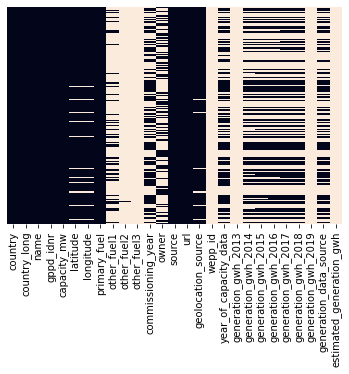

In [677]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [678]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
capacity_mw,907.0,326.223755,590.085456,0.0000,16.725000,59.200000,385.250000,4760.000
latitude,861.0,21.197918,6.239612,8.1689,16.773900,21.780000,25.512400,34.649
longitude,861.0,77.464907,4.939316,68.6447,74.256200,76.719500,79.440800,95.408
other_fuel3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
commissioning_year,527.0,1997.091082,17.082868,1927.0000,1988.000000,2001.000000,2012.000000,2018.000
wepp_id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_of_capacity_data,519.0,2019.000000,0.000000,2019.0000,2019.000000,2019.000000,2019.000000,2019.000
generation_gwh_2013,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation_gwh_2014,398.0,2431.823590,4026.440035,0.0000,223.557672,801.123775,3035.306250,28127.000
generation_gwh_2015,422.0,2428.226946,4194.596959,0.0000,176.381062,711.181225,3084.121250,30539.000


In [679]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [680]:
df.country.unique()

array(['IND'], dtype=object)

In [681]:
df.groupby(['country','primary_fuel']).size()

country  primary_fuel
IND      Biomass          50
         Coal            258
         Gas              69
         Hydro           251
         Nuclear           9
         Oil              20
         Solar           127
         Wind            123
dtype: int64

In [682]:
df.groupby(['commissioning_year','primary_fuel']).size().reset_index()

,commissioning_year,primary_fuel,0
0,1927.0,Hydro,1
1,1937.0,Hydro,1
2,1939.0,Hydro,1
3,1943.0,Hydro,1
4,1946.0,Hydro,1
...,...,...,...
158,2016.0,Hydro,2
159,2017.0,Coal,7
160,2017.0,Hydro,9
161,2018.0,Coal,4


In [683]:
plant_types = df.groupby(['primary_fuel']).size().reset_index().rename(columns={0:'Count'})

<AxesSubplot:xlabel='primary_fuel', ylabel='Count'>

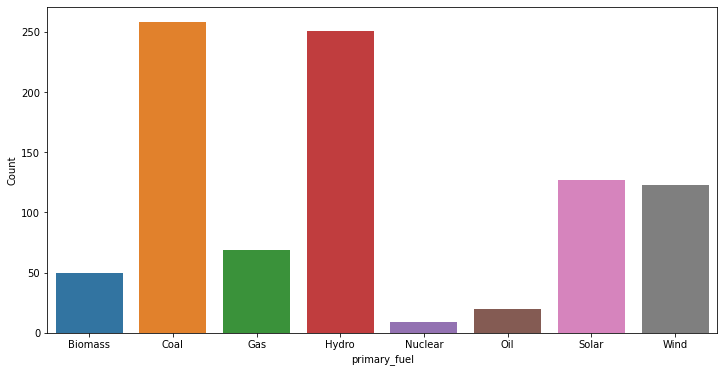

In [684]:
plt.figure(figsize =(12,6))
sns.barplot(x='primary_fuel',y='Count',data = plant_types)

### Coal plants over the years

In [685]:
coal = df[df['primary_fuel']=='Coal']['commissioning_year'].value_counts().reset_index().rename(columns = {'index':'commissioning_year','commissioning_year':'no_of_plants_est'})

<AxesSubplot:xlabel='commissioning_year', ylabel='no_of_plants_est'>

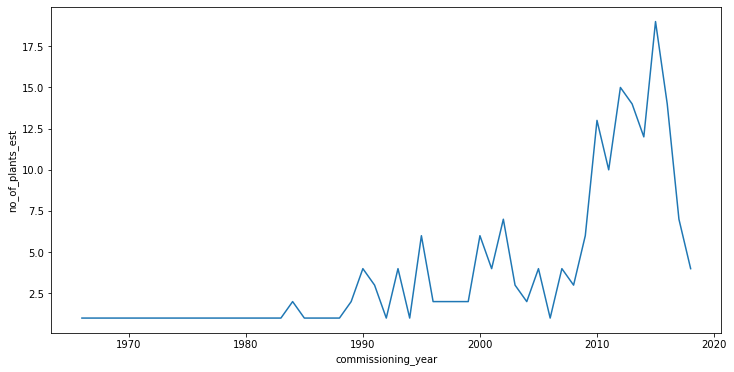

In [686]:
plt.figure(figsize =(12,6))
sns.lineplot(x='commissioning_year',y='no_of_plants_est',data = coal)

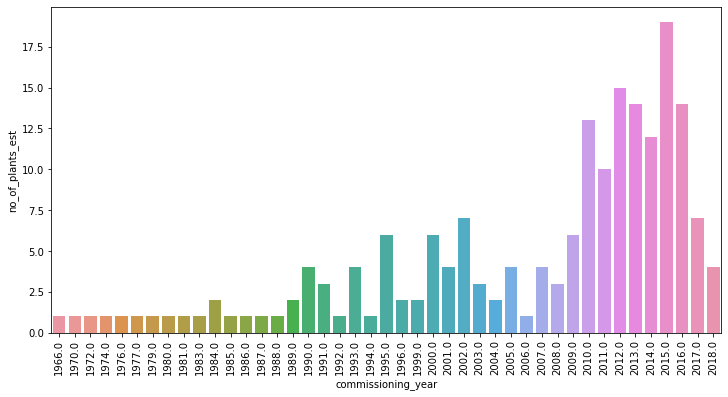

In [687]:
plt.figure(figsize =(12,6))
sns.barplot(x='commissioning_year',y='no_of_plants_est',data = coal)
plt.xticks(rotation =90)
plt.show()

## Hydro plants over the years

In [688]:
hydro = df[df['primary_fuel']=='Hydro']['commissioning_year'].value_counts().reset_index().rename(columns = {'index':'commissioning_year','commissioning_year':'no_of_plants_est'})

<AxesSubplot:xlabel='commissioning_year', ylabel='no_of_plants_est'>

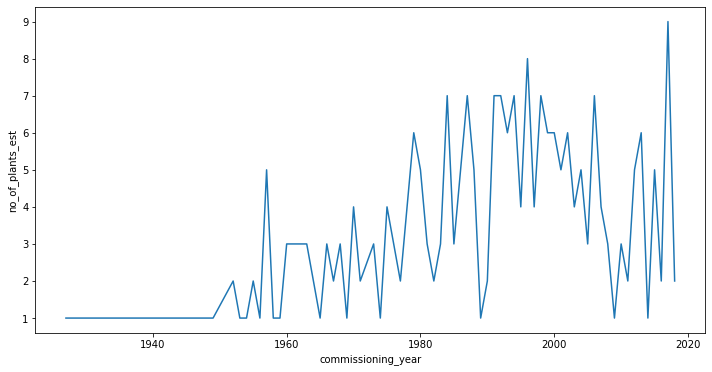

In [689]:
plt.figure(figsize =(12,6))
sns.lineplot(x='commissioning_year',y='no_of_plants_est',data = hydro)

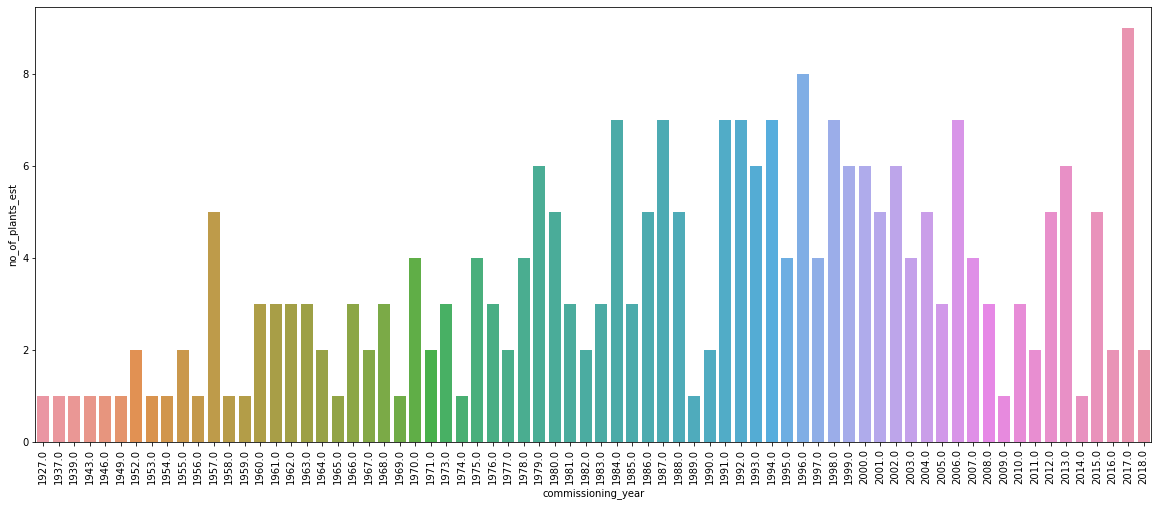

In [690]:
plt.figure(figsize =(20,8))
sns.barplot(x='commissioning_year',y='no_of_plants_est',data = hydro)
plt.xticks(rotation =90)
plt.show()

## Solar plants over the years

In [691]:
solar = df[df['primary_fuel']=='Solar']['commissioning_year'].value_counts().reset_index().rename(columns = {'index':'commissioning_year','commissioning_year':'no_of_plants_est'})

In [692]:
solar

,commissioning_year,no_of_plants_est
0,2014.0,3
1,2013.0,3
2,2011.0,1
3,2015.0,1


<AxesSubplot:xlabel='commissioning_year', ylabel='no_of_plants_est'>

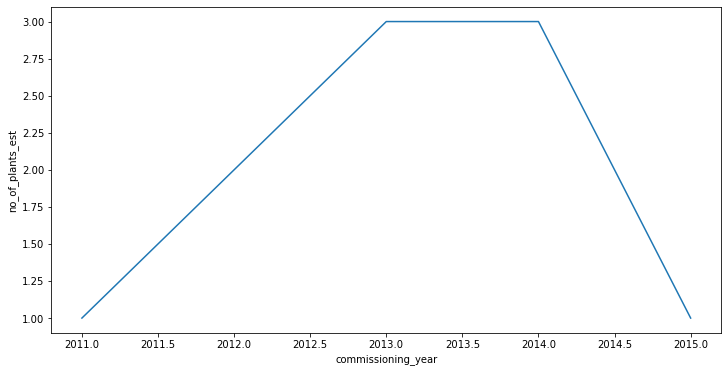

In [693]:
plt.figure(figsize =(12,6))
sns.lineplot(x='commissioning_year',y='no_of_plants_est',data = solar)

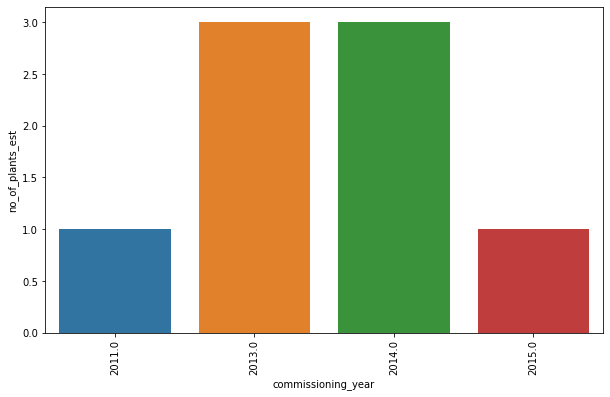

In [694]:
plt.figure(figsize =(10,6))
sns.barplot(x='commissioning_year',y='no_of_plants_est',data = solar)
plt.xticks(rotation =90)
plt.show()

## Wind Energy plants over the years

In [695]:
df[df['primary_fuel']=='Wind']['commissioning_year']

2     NaN
27    NaN
29    NaN
30    NaN
31    NaN
       ..
896   NaN
897   NaN
898   NaN
904   NaN
906   NaN
Name: commissioning_year, Length: 123, dtype: float64

In [696]:
df[df['primary_fuel']=='Biomass']['commissioning_year']

19    NaN
20    NaN
21    NaN
40    NaN
70    NaN
71    NaN
80    NaN
94    NaN
152   NaN
164   NaN
165   NaN
180   NaN
185   NaN
255   NaN
257   NaN
260   NaN
262   NaN
286   NaN
321   NaN
337   NaN
347   NaN
354   NaN
355   NaN
356   NaN
357   NaN
361   NaN
379   NaN
426   NaN
450   NaN
496   NaN
516   NaN
517   NaN
520   NaN
576   NaN
633   NaN
640   NaN
679   NaN
686   NaN
687   NaN
688   NaN
689   NaN
692   NaN
698   NaN
710   NaN
716   NaN
717   NaN
730   NaN
819   NaN
874   NaN
900   NaN
Name: commissioning_year, dtype: float64

In [697]:
df[['latitude','longitude']][df['primary_fuel']=='Coal']

,latitude,longitude
1,24.7663,74.6090
4,21.9603,82.4091
5,23.7689,68.6447
9,23.1642,81.6373
10,21.0782,77.9009
...,...,...
890,20.2727,78.9792
891,20.6964,78.6385
899,30.1081,77.3257
902,16.2949,77.3568


In [698]:
coal_loc = df[['latitude','longitude']][df['primary_fuel']=='Coal']
coal_loc.dropna(inplace=True)

In [699]:
coal_map = folium.Map(location=[20,0],tiles='Stamen Terrain',zoom_start=1,min_zoom=1.0)
coal_map.add_child(plugins.HeatMap(coal_loc))
coal_map

In [700]:
hydro_loc = df[['latitude','longitude']][df['primary_fuel']=='Hydro']
hydro_loc.dropna(inplace=True)

In [701]:
hydro_map = folium.Map(location=[20,0],tiles='Stamen Terrain',zoom_start=1,min_zoom=1.0)
hydro_map.add_child(plugins.MarkerCluster(hydro_loc))
plugins.Fullscreen(
    position='topright',
    title='Expand me',
    title_cancel='Exit me',
    force_separate_button=True).add_to(hydro_map)
plugins.LocateControl().add_to(hydro_map)

hydro_map

In [702]:
solar_loc = df[['latitude','longitude']][df['primary_fuel']=='Solar']
solar_loc.dropna(inplace=True)

solar_map = folium.Map(location=[20,0],tiles='Stamen Terrain',zoom_start=1,min_zoom=1.0)
solar_map.add_child(plugins.MarkerCluster(solar_loc))
plugins.Fullscreen(
    position='topright',
    title='Expand me',
    title_cancel='Exit me',
    force_separate_button=True).add_to(solar_map)
plugins.LocateControl().add_to(solar_map)

solar_map

In [703]:
wind_loc = df[['latitude','longitude']][df['primary_fuel']=='Wind']
wind_loc.dropna(inplace=True)

wind_map = folium.Map(location=[20,0],tiles='Stamen Terrain',zoom_start=1,min_zoom=1.0)
wind_map.add_child(plugins.MarkerCluster(wind_loc))
plugins.Fullscreen(
    position='topright',
    title='Expand me',
    title_cancel='Exit me',
    force_separate_button=True).add_to(wind_map)
plugins.LocateControl().add_to(wind_map)

wind_map

In [704]:
wind_map = folium.Map(location=[20,0],tiles='Stamen Terrain',zoom_start=1,min_zoom=1.0)
wind_map.add_child(plugins.HeatMap(wind_loc))
wind_map

In [705]:
fuel_capacity = df.groupby('primary_fuel').sum()['capacity_mw'].sort_values(ascending =False).reset_index()

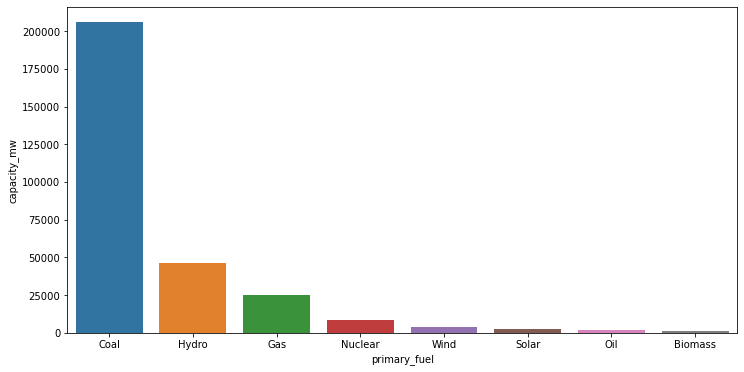

In [706]:
plt.figure(figsize=(12,6))
sns.barplot(x='primary_fuel',y='capacity_mw',data=fuel_capacity)
plt.show()

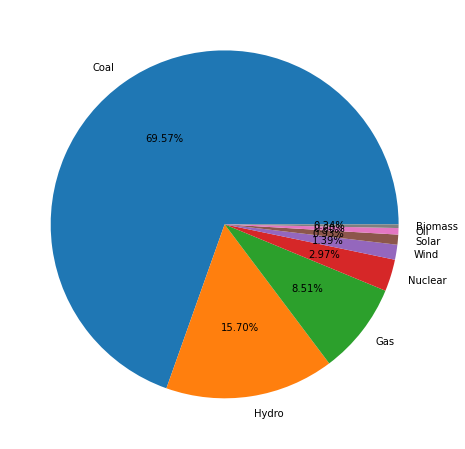

In [707]:
plt.figure(figsize=(15,8))
plt.pie(x='capacity_mw',data =fuel_capacity,autopct='%.2f%%',labels = 'primary_fuel')
plt.show()

In [708]:
df['owner'].nunique()

280

In [709]:
top_10_power_comp = df['owner'].value_counts()[:10].reset_index().rename(columns={'index':'owner','owner':'no_of_projects'})

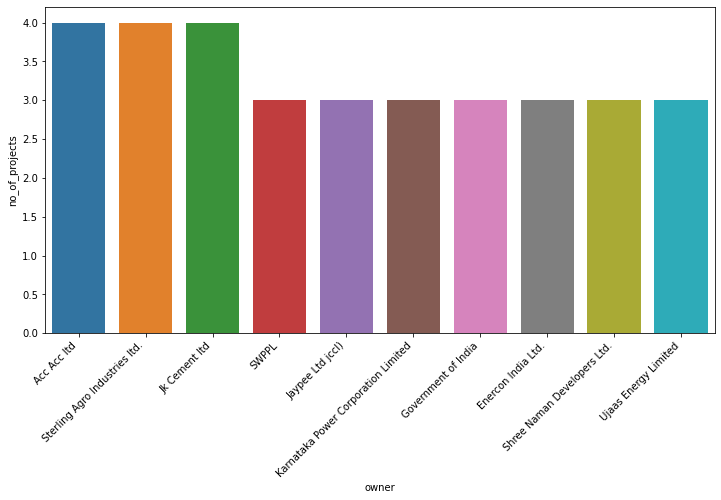

In [710]:
plt.figure(figsize=(12,6))
sns.barplot(x='owner',y='no_of_projects',data = top_10_power_comp)
plt.xticks(rotation =45,ha='right')
plt.show()

In [711]:
df['source'].nunique()

191

In [712]:
top_10_source = df['source'].value_counts()[:10].reset_index().rename(columns={'index':'source','source':'no_of_projects'})

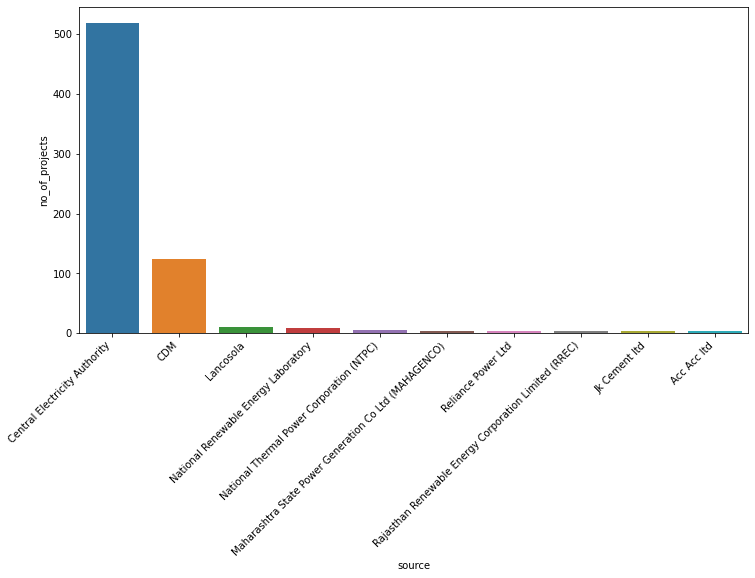

In [713]:
plt.figure(figsize=(12,6))
sns.barplot(x='source',y='no_of_projects',data = top_10_source)
plt.xticks(rotation =45,ha='right')
plt.show()

# Feature Engineering

In [714]:
df.head(2)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [715]:
df['name'].nunique()

907

In [716]:
df['country'].nunique()

1

In [717]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [718]:
df.drop(columns  = ['country','country_long','latitude','longitude','other_fuel1','other_fuel2','other_fuel3','wepp_id','generation_gwh_2013','generation_data_source','estimated_generation_gwh'],inplace=True)

In [719]:
df.head(2)

,name,gppd_idnr,capacity_mw,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,ACME Solar Tower,WRI1020239,2.5,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,WRI1019881,98.0,Coal,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [720]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   907 non-null    object 
 1   gppd_idnr              907 non-null    object 
 2   capacity_mw            907 non-null    float64
 3   primary_fuel           907 non-null    object 
 4   commissioning_year     527 non-null    float64
 5   owner                  342 non-null    object 
 6   source                 907 non-null    object 
 7   url                    907 non-null    object 
 8   geolocation_source     888 non-null    object 
 9   year_of_capacity_data  519 non-null    float64
 10  generation_gwh_2014    398 non-null    float64
 11  generation_gwh_2015    422 non-null    float64
 12  generation_gwh_2016    434 non-null    float64
 13  generation_gwh_2017    440 non-null    float64
 14  generation_gwh_2018    448 non-null    float64
 15  genera

In [721]:
df['commissioning_year'] = df['commissioning_year'].fillna(df['commissioning_year'].mode()[0])

In [722]:
df

,name,gppd_idnr,capacity_mw,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,ACME Solar Tower,WRI1020239,2.5,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,WRI1019881,98.0,Coal,2015.0,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,WRI1026669,39.2,Wind,2015.0,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,IND0000001,135.0,Gas,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,NaN
4,AKALTARA TPP,IND0000002,1800.0,Coal,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,YERMARUS TPP,IND0000513,1600.0,Coal,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,NaN,0.994875,233.596650,865.400000,686.500000,NaN
903,Yelesandra Solar Power Plant,WRI1026222,3.0,Solar,2015.0,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,Yelisirur wind power project,WRI1026776,25.5,Wind,2015.0,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,ZAWAR MINES,WRI1019901,80.0,Coal,2015.0,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [723]:
df

,name,gppd_idnr,capacity_mw,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,ACME Solar Tower,WRI1020239,2.5,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,WRI1019881,98.0,Coal,2015.0,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,WRI1026669,39.2,Wind,2015.0,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,IND0000001,135.0,Gas,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,NaN
4,AKALTARA TPP,IND0000002,1800.0,Coal,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,YERMARUS TPP,IND0000513,1600.0,Coal,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,NaN,0.994875,233.596650,865.400000,686.500000,NaN
903,Yelesandra Solar Power Plant,WRI1026222,3.0,Solar,2015.0,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,Yelisirur wind power project,WRI1026776,25.5,Wind,2015.0,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,ZAWAR MINES,WRI1019901,80.0,Coal,2015.0,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [724]:
df['owner'].fillna(method='ffill')

0                              Solar Paces
1                     Ultratech Cement ltd
2                                      AES
3                                      AES
4                                      AES
                      ...                 
902                Yashwantrao Krishna ssk
903    Karnataka Power Corporation Limited
904    Karnataka Power Corporation Limited
905                     Hindustan Zinc ltd
906                     iEnergy Wind Farms
Name: owner, Length: 907, dtype: object

In [725]:
for col in df.columns:
    df[col].fillna(method='ffill',inplace=True)

In [726]:
df.shape

(907, 16)

In [727]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [728]:
df.isnull().sum()

name                       0
gppd_idnr                  0
capacity_mw                0
primary_fuel               0
commissioning_year         0
owner                      0
source                     0
url                        0
geolocation_source         0
year_of_capacity_data      3
generation_gwh_2014        3
generation_gwh_2015        3
generation_gwh_2016        3
generation_gwh_2017        3
generation_gwh_2018        3
generation_gwh_2019      907
dtype: int64

In [729]:
df.drop('generation_gwh_2019',axis =1,inplace=True)

In [730]:
df.dropna(inplace=True)

In [731]:
df.head()

,name,gppd_idnr,capacity_mw,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
3,AGARTALA GT,IND0000001,135.0,Gas,2004.0,AES,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.7470,886.004428,663.774500,626.239128
4,AKALTARA TPP,IND0000002,1800.0,Coal,2015.0,AES,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.3700,6243.000000,5385.579736,7279.000000
5,AKRIMOTA LIG,IND0000003,250.0,Coal,2005.0,AES,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,1153.421000,1208.8520,1175.765000,1147.913000,976.655000
6,ALIYAR,IND0000004,60.0,Hydro,1970.0,AES,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,157.558250,152.1952,61.421350,89.629600,48.327150
7,ALLAIN DUHANGAN,IND0000005,192.0,Hydro,2010.0,AES,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,674.391100,721.3352,675.724400,679.594950,579.318850


In [732]:
df.drop(columns =['name','gppd_idnr','url'],inplace=True)

In [733]:
df

,capacity_mw,primary_fuel,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
3,135.0,Gas,2004.0,AES,Central Electricity Authority,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,Coal,2015.0,AES,Central Electricity Authority,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
5,250.0,Coal,2005.0,AES,Central Electricity Authority,WRI,2019.0,1153.421000,1208.852000,1175.765000,1147.913000,976.655000
6,60.0,Hydro,1970.0,AES,Central Electricity Authority,WRI,2019.0,157.558250,152.195200,61.421350,89.629600,48.327150
7,192.0,Hydro,2010.0,AES,Central Electricity Authority,WRI,2019.0,674.391100,721.335200,675.724400,679.594950,579.318850
...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,Coal,2016.0,Yashwantrao Krishna ssk,Central Electricity Authority,WRI,2019.0,0.000000,0.994875,233.596650,865.400000,686.500000
903,3.0,Solar,2015.0,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,Industry About,2019.0,0.000000,0.994875,233.596650,865.400000,686.500000
904,25.5,Wind,2015.0,Karnataka Power Corporation Limited,CDM,WRI,2019.0,0.000000,0.994875,233.596650,865.400000,686.500000
905,80.0,Coal,2015.0,Hindustan Zinc ltd,Hindustan Zinc ltd,WRI,2019.0,0.000000,0.994875,233.596650,865.400000,686.500000


In [734]:
df.isnull().sum()

capacity_mw              0
primary_fuel             0
commissioning_year       0
owner                    0
source                   0
geolocation_source       0
year_of_capacity_data    0
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
generation_gwh_2018      0
dtype: int64

In [735]:
df = df.apply(le.fit_transform)

In [736]:
df

,capacity_mw,primary_fuel,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
3,197,2,58,2,22,2,0,156,196,197,176,174
4,337,1,69,2,22,2,0,271,348,359,338,373
5,229,1,59,2,22,2,0,194,221,211,207,198
6,144,3,24,2,22,2,0,54,67,30,39,16
7,214,3,64,2,22,2,0,160,185,180,177,161
...,...,...,...,...,...,...,...,...,...,...,...,...
902,333,1,70,275,22,2,0,0,3,99,193,182
903,9,6,69,114,77,0,0,0,3,99,193,182
904,80,7,69,114,21,2,0,0,3,99,193,182
905,165,1,69,91,59,2,0,0,3,99,193,182


In [737]:
df.skew()

capacity_mw              0.242745
primary_fuel             0.475796
commissioning_year      -1.617037
owner                   -0.099291
source                   1.839501
geolocation_source      -2.106018
year_of_capacity_data    0.000000
generation_gwh_2014      0.023207
generation_gwh_2015      0.022608
generation_gwh_2016      0.091224
generation_gwh_2017      0.057849
generation_gwh_2018      0.121438
dtype: float64

<AxesSubplot:xlabel='commissioning_year', ylabel='Count'>

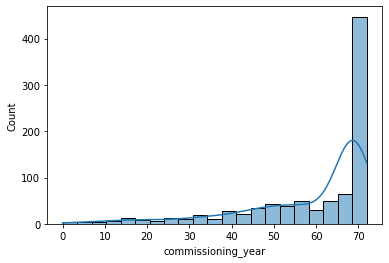

In [738]:
sns.histplot(df['commissioning_year'],kde=True)

<AxesSubplot:xlabel='source', ylabel='Count'>

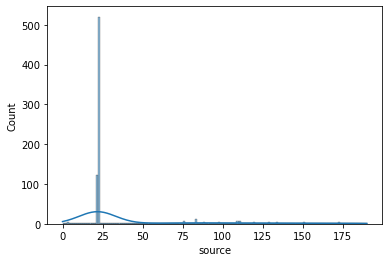

In [739]:
sns.histplot(df['source'],kde=True)

<AxesSubplot:xlabel='geolocation_source', ylabel='Count'>

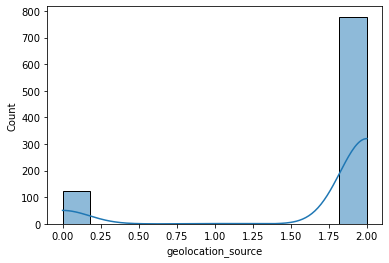

In [740]:
sns.histplot(df['geolocation_source'],kde=True)

In [741]:
from sklearn.preprocessing import PowerTransformer
trans = PowerTransformer(method='yeo-johnson')

In [742]:
skewed = ['commissioning_year','source']

In [743]:
df[skewed] = trans.fit_transform(df[skewed].values)

In [744]:
df.skew()

capacity_mw              0.242745
primary_fuel             0.475796
commissioning_year      -0.785211
owner                   -0.099291
source                  -0.215915
geolocation_source      -2.106018
year_of_capacity_data    0.000000
generation_gwh_2014      0.023207
generation_gwh_2015      0.022608
generation_gwh_2016      0.091224
generation_gwh_2017      0.057849
generation_gwh_2018      0.121438
dtype: float64

In [745]:
df.drop('geolocation_source',axis =1,inplace=True)

In [746]:
df.head()

,capacity_mw,primary_fuel,commissioning_year,owner,source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
3,197,2,-0.374824,2,-0.400771,0,156,196,197,176,174
4,337,1,0.786250,2,-0.400771,0,271,348,359,338,373
5,229,1,-0.285844,2,-0.400771,0,194,221,211,207,198
6,144,3,-1.929339,2,-0.400771,0,54,67,30,39,16
7,214,3,0.207348,2,-0.400771,0,160,185,180,177,161


C:\Users\bhanu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bhanu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


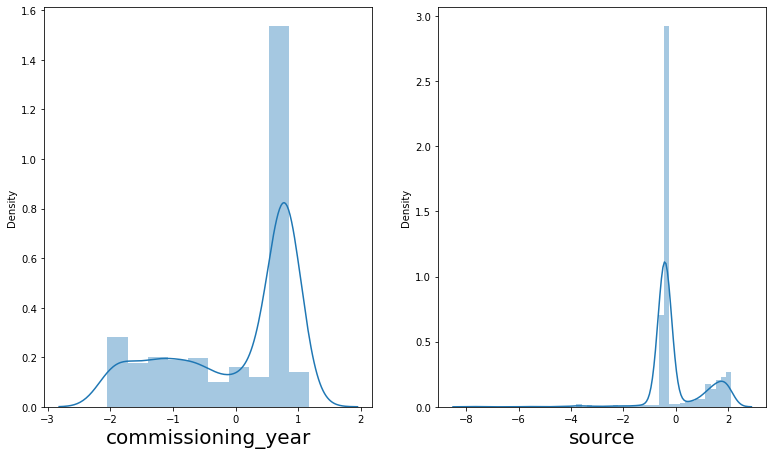

In [747]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df[skewed]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [748]:
df.skew()

capacity_mw              0.242745
primary_fuel             0.475796
commissioning_year      -0.785211
owner                   -0.099291
source                  -0.215915
year_of_capacity_data    0.000000
generation_gwh_2014      0.023207
generation_gwh_2015      0.022608
generation_gwh_2016      0.091224
generation_gwh_2017      0.057849
generation_gwh_2018      0.121438
dtype: float64

In [749]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [750]:
scaled = sc.fit_transform(df)

In [751]:
df_scaled = pd.DataFrame(scaled, index=df.index, columns=df.columns)

In [752]:
df_scaled

,capacity_mw,primary_fuel,commissioning_year,owner,source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
3,0.398358,-0.527684,-0.374824,-1.750576,-0.400771,0.0,-0.146016,0.061252,0.089572,-0.052158,-0.041243
4,1.713195,-0.966935,0.786250,-1.750576,-0.400771,0.0,0.845483,1.294615,1.344730,1.179638,1.438811
5,0.698892,-0.966935,-0.285844,-1.750576,-0.400771,0.0,0.181610,0.264107,0.198043,0.183556,0.137256
6,-0.099402,-0.088433,-1.929339,-1.750576,-0.400771,0.0,-1.025434,-0.985484,-1.204325,-1.093861,-1.216362
7,0.558016,-0.088433,0.207348,-1.750576,-0.400771,0.0,-0.111529,-0.028005,-0.042142,-0.044554,-0.137930
...,...,...,...,...,...,...,...,...,...,...,...
902,1.675629,-0.966935,0.912946,1.736982,-0.400771,0.0,-1.491007,-1.504795,-0.669721,0.077105,0.018256
903,-1.367282,1.229320,0.786250,-0.319783,1.217175,0.0,-1.491007,-1.504795,-0.669721,0.077105,0.018256
904,-0.700471,1.668571,0.786250,-0.319783,-0.469537,0.0,-1.491007,-1.504795,-0.669721,0.077105,0.018256
905,0.097823,-0.966935,0.786250,-0.613607,0.910152,0.0,-1.491007,-1.504795,-0.669721,0.077105,0.018256


In [753]:
X= df_scaled.drop(columns=['capacity_mw'],axis =1)
y = df_scaled['capacity_mw']

In [754]:
from sklearn.model_selection import train_test_split

In [767]:
from sklearn.ensemble import RandomForestRegressor
score=[]
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(df_scaled,y,test_size=0.3, random_state =i)
    rfr = RandomForestRegressor()
    rfr.fit(X_train, y_train)
    score.append(rfr.score(X_test, y_test))

results = pd.DataFrame({'score':score})
results[results['score'] == results['score'].max()]

,score
66,0.999976


In [768]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=66)

In [769]:
from sklearn import metrics

In [770]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

In [771]:
lr = LinearRegression()
lr.fit(X_train,y_train)
print('Accuracy: ',lr.score(X_test,y_test))
lrpred = lr.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, lrpred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, lrpred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, lrpred)))

Accuracy:  0.3614661800730824
Mean Absolute Error: 0.646622170185753
Mean Squared Error: 0.6493998306794309
Root Mean Squared Error: 0.8058534796595662


In [772]:
ridge = Ridge(alpha=0.5)
ridge.fit(X_train,y_train)
rpred = ridge.predict(X_test)
print('Accuracy: ',ridge.score(X_test,y_test))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, rpred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, rpred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rpred)))

Accuracy:  0.3617530639692248
Mean Absolute Error: 0.6466138928382681
Mean Squared Error: 0.6491080648437532
Root Mean Squared Error: 0.8056724302368508


In [773]:
lasso = Lasso(alpha=0.2, fit_intercept=True, normalize=False, precompute=False, max_iter=1000,tol=0.0001, warm_start=False, 
              positive=False, random_state=None, selection='cyclic')
lasso.fit(X_train,y_train)
lpred = lasso.predict(X_test)
print('Accuracy: ',lasso.score(X_test,y_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, lpred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, lpred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, lpred)))

Accuracy:  0.3133455560274895
Mean Absolute Error: 0.7344127576239179
Mean Squared Error: 0.6983393294689755
Root Mean Squared Error: 0.8356669967570668


C:\Users\bhanu\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


In [774]:
ranforreg = RandomForestRegressor(n_estimators = 100, criterion = 'mse',random_state = 1,n_jobs = -1)
ranforreg.fit(X_train,y_train)
rfpred = ranforreg.predict(X_test)
print('Accuracy: ',ranforreg.score(X_test,y_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, lrpred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, lrpred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, lrpred)))

C:\Users\bhanu\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


Accuracy:  0.7139820291071792
Mean Absolute Error: 0.646622170185753
Mean Squared Error: 0.6493998306794309
Root Mean Squared Error: 0.8058534796595662


In [775]:
import pickle
pickle.dump(ranforreg,open('RandomForestRegressor.pkl','wb'))